Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [7]:
rel = transactions.loc[transactions['date_block_num'] == 20]
rel['signed_sum'] = rel['item_price'] * rel['item_cnt_day']
gb = rel.groupby(['shop_id']).signed_sum.sum()

/home/ivan/venvs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
max(gb)

7982852.199999956

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [11]:
# YOUR CODE GOES HERE

max_revenue = max(gb)
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [13]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [15]:
rel = transactions.loc[(transactions['date_block_num'] < 20) & (transactions['date_block_num'] >= 17)]
rel['signed_sum'] = rel['item_price'] * rel['item_cnt_day']

with_categories = pd.merge(rel, items, how='left', on='item_id')

/home/ivan/venvs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
cat_gb = with_categories.groupby(['item_category_id']).signed_sum.sum().reset_index()

In [30]:
cat_gb['signed_sum'].max()

32157302.430000115

In [31]:
cat_gb['signed_sum'].argmax()

15

In [32]:
cat_gb.loc[cat_gb['signed_sum'].argmax()]

item_category_id          20.00
signed_sum          32157302.43
Name: 15, dtype: float64

In [23]:
pd.set_option('display.max_rows', 77)

In [24]:
cat_gb

item_category_id
2      2755520.00
3      6854669.80
4        38833.20
5       418233.10
6      3360382.50
8       433200.00
9       291426.84
11     4970925.00
12    31385229.70
13        4686.00
14     2337794.30
15     5047875.80
16      191141.00
17      167175.00
19    26237112.15
20    32157302.43
21      991094.01
22     2958475.70
23    19896624.03
25     1032434.35
28     8868913.27
29     2286658.00
30    15876623.34
31     1209713.95
32      979500.00
33     1175955.70
34      248880.00
35     3658967.10
37     7108188.56
38     2418047.46
39       37810.70
40    12375973.07
41     2395884.94
43      708957.20
44        2500.00
45       90326.50
46         511.00
49     1004600.10
51         129.00
54      128975.00
55     9468644.35
56      493331.10
57      850384.80
58     1813753.20
59        9549.00
60      327909.00
61      698523.80
62     2005028.90
63     3921749.95
64     3340694.95
65     2015607.90
66         730.00
67     2418752.20
69     2268859.50
70      820

In [33]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [34]:
transactions

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [98]:
transactions.shop_id.nunique()

60

In [101]:
rel = transactions.drop(transactions.loc[transactions['item_cnt_day'] < 0].index)
gb = rel.groupby('item_id').item_price.nunique()

In [53]:
rel

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [56]:
gb.loc[gb == 1]

item_id
0        1
1        1
2        1
4        1
5        1
        ..
22159    1
22161    1
22165    1
22166    1
22169    1
Name: item_price, Length: 5926, dtype: int64

In [102]:
gb = rel.groupby('item_id').item_price.var()

In [105]:
gb.value_counts(dropna=False)

0.000000        3553
NaN             2373
5000.000000       25
1250.000000       23
300.000000        17
                ... 
690.437158         1
854.185622         1
30573.707267       1
1356.426136        1
1391.176471        1
Name: item_price, Length: 15390, dtype: int64

In [107]:
gb = rel.groupby('item_id').item_price

In [57]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [ ]:
df = pd.DataFrame(data={'host_since': ['']})

In [91]:
shop_id = 25

rel = transactions.loc[(transactions['shop_id'] == 25) & (transactions['date_block_num'] == 23)]

In [82]:
rel.groupby(['date', 'item_id']).item_cnt_day.sum().reset_index()

,date,item_id,item_cnt_day
0,01.12.2014,989,1.0
1,01.12.2014,992,1.0
2,01.12.2014,1535,1.0
3,01.12.2014,2078,1.0
4,01.12.2014,2140,1.0
...,...,...,...
4358,31.12.2014,21674,1.0
4359,31.12.2014,21706,1.0
4360,31.12.2014,21732,1.0
4361,31.12.2014,21969,1.0


In [83]:
returned_back_items = transactions.loc[(transactions['item_cnt_day'] < 0) & (transactions['date_block_num'] >= 23)]

In [90]:
returned_back_items

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2193895,19.12.2014,23,42,10101,299.0,-1.0
2193897,19.12.2014,23,42,10102,299.0,-1.0
2193903,02.12.2014,23,42,10156,7499.0,-1.0
2195327,10.12.2014,23,43,21619,499.0,-1.0
2195338,30.12.2014,23,43,21199,1299.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [85]:
merged = pd.merge(rel, returned_back_items, how='left', on='item_id')

In [89]:
merged.date_y.dropna()

Series([], Name: date_y, dtype: object)

In [71]:
returned_back_items = transactions.loc[(transactions['item_cnt_day'] < 0) & (transactions['item_cnt_day'])].item_id
rel = rel.loc[~rel['item_id'].isin(returned_back_items)]

In [78]:
returned_back_items

2           2552
148         2321
175         2199
807         2330
1041        5034
           ...  
2934243     3917
2934462     4896
2935263    10039
2935643     7893
2935779     7087
Name: item_id, Length: 7356, dtype: int64

In [72]:
rel

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,14.12.2014,23,25,21752,399.0,1.0
2295838,13.12.2014,23,25,21752,399.0,3.0
2295840,31.12.2014,23,25,21732,149.0,1.0
2295846,25.12.2014,23,25,21799,999.0,1.0
2295848,26.12.2014,23,25,21797,999.0,1.0
...,...,...,...,...,...,...
2323393,17.12.2014,23,25,5013,998.0,1.0
2323394,24.12.2014,23,25,5012,399.0,1.0
2323395,19.12.2014,23,25,5012,399.0,1.0
2323396,07.12.2014,23,25,5012,399.0,2.0


In [92]:
gb = rel.groupby('date').item_cnt_day.sum()

In [48]:
gb.reset_index().head()

,date,item_cnt_day
0,01.12.2014,153.0
1,02.12.2014,169.0
2,03.12.2014,195.0
3,04.12.2014,164.0
4,05.12.2014,300.0


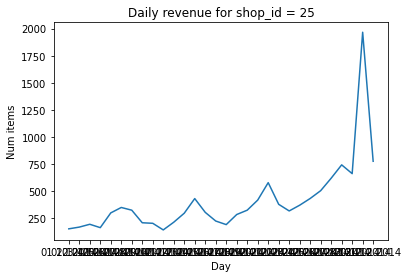

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [93]:
shop_id = 25

total_num_items_sold = gb.reset_index()['item_cnt_day'] # YOUR CODE GOES HERE
days = gb.reset_index()['date']# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = gb.var()# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [96]:
STUDENT_EMAIL = ''
STUDENT_TOKEN = ''
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [97]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)